# Import Data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
filepath ='/resources/data/Police_Department_Incidents2016.csv'
data = pd.read_csv(filepath)
data.head()
#data.describe()
data.shape


(150500, 14)

# Clean Data by removing non-criminal record

for i in range(0,data.shape[0]):
    if data.iloc[i, 1] == 'NON-CRIMINAL':
        data = data.drop([i])
data.shape    
#df.drop(['B', 'C'], axis=1) drop column by name
# df.drop([0, 1]) drop row by index

In [3]:
#alternative more efficient code
data2 = data[data['Category'] != 'NON-CRIMINAL']
data2 = data2[data['Category'] != 'OTHER OFFENSES'] #remove unlabelled crime type
data2 = data2[data['Category'] != 'SUSPICIOUS OCC'] #remove unlabelled crime type
data2 = data2[data['Category'] != 'MISSING PERSON'] #remove unlabelled crime type
data2 = data2[data['Category'] != 'SECONDARY CODES'] #remove unlabelled crime type
data2.head()
data2.loc[0, 'Resolution']

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


'ARREST, BOOKED'

test = data.iloc[0:4, 0:4] #test code for selecting subset of first 4 row 4 column
for i in range(0,test.shape[0]):
    if test.iloc[i, 1] == 'NON-CRIMINAL':
        test = test.drop([i])
#df = df[df.index != 790]
test

# Let's take a look at the summary report

In [ ]:
## category of crime sorted

In [4]:
#test code
data3 = data2.iloc[:, 1:4].groupby(['Category', 'SeriousCrimeTag']).count().reset_index()
data4 = data3.sort_values(['Descript'], ascending=False).reset_index()
#data4.columns = ['Category', 'SeriousCrimeTag', 'Count'] + data4.columns[2:].tolist()
#data3['count'] = data2.iloc[:, 1:3].groupby(['Category', 'SeriousCrimeTag'])['Category'].transform('count')
#data3 = data2.iloc[:, 1:3].groupby(['Category'], sort=True).count().reset_index()
data4 =data4.rename(columns = {'Descript':'Count'})

i = data4['Count'].sum(axis = 0, skipna = True)
data4['pct%'] = round(data4['Count']/i*100,1)
data4= data4.drop(['index'], axis =1) 
data4.head(10)



,Category,SeriousCrimeTag,Count,pct%
0,LARCENY/THEFT,N,40409,40.0
1,ASSAULT,Y,13577,13.4
2,VANDALISM,N,8589,8.5
3,VEHICLE THEFT,N,6419,6.4
4,WARRANTS,N,5914,5.9
5,BURGLARY,N,5802,5.7
6,DRUG/NARCOTIC,N,4243,4.2
7,ROBBERY,Y,3299,3.3
8,FRAUD,N,2635,2.6
9,TRESPASS,N,1812,1.8


In [9]:
# Create Herfindal Index calculation for ungroupped data
def concentration(df, col):
    return ((df[col].value_counts() / df[col].count()) ** 2).sum()
# Create Herfindal Index calculation for groupped data
def concentration2(df, col):
    return (df[col] ** 2).sum()

#test failed code for some reason
data3 = data2.iloc[:, 1:4].groupby(['PdD', 'SeriousCrimeTag']).count().reset_index()
#data4 = data3.sort_values(['SeriousCrimeTag'], ascending=True).reset_index()
data3['count'] = data2.iloc[:, 1:4].groupby(['Category', 'SeriousCrimeTag'])['Descript'].transform('count')
#data3 = data2.iloc[:, 1:3].groupby(['Category'], sort=True).count().reset_index()
data3


#data4.columns = ['Category', 'SeriousCrimeTag', 'Count'] + data4.columns[2:].tolist()
#data3['count'] = data2.iloc[:, 1:3].groupby(['Category', 'SeriousCrimeTag'])['Category'].transform('count')
#data3 = data2.iloc[:, 1:3].groupby(['Category'], sort=True).count().reset_index()

In [10]:
concentration2(data4, 'pct%')

2005.2

In [8]:
data4.shape

(34, 4)

# Look at crime data by district

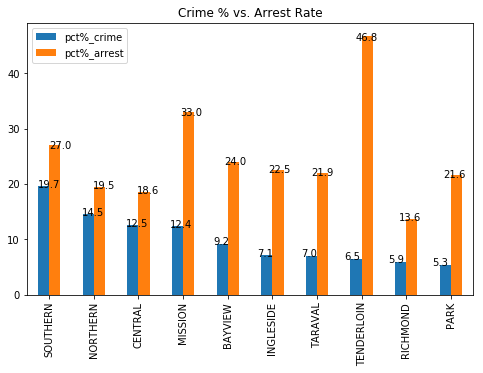

In [95]:
#test code group data by district
data3 = data2[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().reset_index()
data4 = data3.sort_values(['PdDistrict'], ascending=True)
#data6 =data4.rename(columns = {'Category':'Count'})
data4 = data4.rename(columns = {'Category':'Count_crime'})
data4

#data3 = data2[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().reset_index()
data7 = data2.groupby('PdDistrict')['Resolution'].apply(lambda x: x[x == 'ARREST, BOOKED'].count())
data7 = data7.rename(columns = {'Resolution':'Count_arrest'})
#data5 = data5.to_frame(name=None)
data7 = pd.DataFrame({'PdDistrict':data7.index, 'Count_arrest':data7.values})
data7

#Let's calcualte the arrest rate on merged table
result2 = pd.merge(data4, data7, on='PdDistrict')
result2 = result2.sort_values(['Count_crime'], ascending=False)

j = result2['Count_crime'].sum(axis = 0, skipna = True)
result2['pct%_crime'] = round(result2['Count_crime']/j*100,1)
result2['pct%_arrest'] = round(result2['Count_arrest']/result2['Count_crime']*100,1)

#data4= data4.drop(['index'], axis =1) 
#data4.head(10)

a = result2.iloc[:,[0, 3, 4]]
a_gf = a.plot(kind='bar', figsize=(8, 5), title = 'Crime % vs. Arrest Rate')
a_gf.set_xticklabels(list(result2['PdDistrict']))

for p in a_gf.patches:
    a_gf.annotate(str(p.get_height()), (p.get_x() * 0.98, p.get_height() * 0.98))

# investigate kidnapping data using the above method


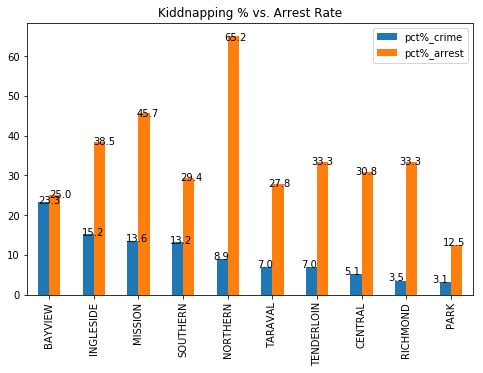

In [97]:
crimedata = data[data['Category'] == 'KIDNAPPING'].reset_index()

#test code group data by district
data3 = crimedata[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().reset_index()
data4 = data3.sort_values(['PdDistrict'], ascending=True)
#data6 =data4.rename(columns = {'Category':'Count'})
data4 = data4.rename(columns = {'Category':'Count_crime'})


#data3 = data2[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().reset_index()
data7 = crimedata.groupby('PdDistrict')['Resolution'].apply(lambda x: x[x == 'ARREST, BOOKED'].count())
data7 = data7.rename(columns = {'Resolution':'Count_arrest'})
#data5 = data5.to_frame(name=None)
data7 = pd.DataFrame({'PdDistrict':data7.index, 'Count_arrest':data7.values})


#Let's calcualte the arrest rate on merged table
result2 = pd.merge(data4, data7, on='PdDistrict')
result2 = result2.sort_values(['Count_crime'], ascending=False)

j = result2['Count_crime'].sum(axis = 0, skipna = True)
result2['pct%_crime'] = round(result2['Count_crime']/j*100,1)
result2['pct%_arrest'] = round(result2['Count_arrest']/result2['Count_crime']*100,1)

#data4= data4.drop(['index'], axis =1) 
#data4.head(10)

a = result2.iloc[:,[0, 3, 4]]
a_gf = a.plot(kind='bar', figsize=(8, 5), title = 'Kiddnapping % vs. Arrest Rate')
a_gf.set_xticklabels(list(result2['PdDistrict']))

for p in a_gf.patches:
    a_gf.annotate(str(p.get_height()), (p.get_x() * 0.98, p.get_height() * 0.98))

#data3 = data2[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().reset_index()
data5 = data2.groupby('PdDistrict')['SeriousCrimeTag'].apply(lambda x: x[x == 'Y'].count())
data5 = data5.rename(columns = {'SeriousCrimeTag':'Count'})
#data5 = data5.to_frame(name=None)
data5 = pd.DataFrame({'PdDistrict':data5.index, 'Count':data5.values})
#data3 = pd.concat([data3, data5], axis=1, ignore_index=True)
data5

#data3 = data2[['PdDistrict', 'Category']].groupby(['PdDistrict']).count().reset_index()
data6 = data2.groupby('PdDistrict')['SeriousCrimeTag'].apply(lambda x: x[x == 'N'].count())
data6 = data6.rename(columns = {'SeriousCrimeTag':'Count'})
#data5 = data5.to_frame(name=None)
data6 = pd.DataFrame({'PdDistrict':data6.index, 'Count':data6.values})
data6


#Merge data

result = pd.merge(data5, data6, on='PdDistrict')
result =result.rename(columns = {'Count_x':'Count(Yes)','Count_y':'Count(No)' })
result = pd.merge(data3, result, on='PdDistrict')
result = result.sort_values(['Count'], ascending=False)
result
# please add also arrest rate to see the effectiveness 

# Investigating a particular crime

,IncidntNum,Category,SeriousCrimeTag,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Longitude,Latitude,Location,PdId
191,160019977,KIDNAPPING,Y,FALSE IMPRISONMENT,Friday,01/08/2016 00:00,08:45,INGLESIDE,"ARREST, BOOKED",100 Block of BROOKDALE AV,-122.420864,37.712200,"(37.71219982598, -122.420864146521)",1.600000e+13
986,160021320,KIDNAPPING,Y,"KIDNAPPING, JUVENILE VICTIM",Friday,01/08/2016 00:00,16:00,SOUTHERN,"ARREST, BOOKED",800 Block of MARKET ST,-122.407634,37.784189,"(37.7841893501425, -122.407633520742)",1.600000e+13
1418,160414593,KIDNAPPING,Y,"KIDNAPPING, ADULT VICTIM",Friday,05/20/2016 12:00:00 AM,23:00,INGLESIDE,NONE,4600 Block of MISSION ST,-122.435408,37.723986,"(37.7239855242312, -122.435408042463)",1.600000e+13
1918,160484712,KIDNAPPING,Y,CHILD STEALING,Saturday,06/11/2016 00:00,12:00,BAYVIEW,NONE,1000 Block of LECONTE AV,-122.398004,37.719033,"(37.7190331787318, -122.39800417734)",1.600000e+13
1936,160024421,KIDNAPPING,Y,FALSE IMPRISONMENT,Saturday,01/09/2016 00:00,18:30,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",1.600000e+13


# Add San Francisco Map

In [101]:
address = 'San Francisco, SF.'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=15)
map_sanfrancisco

The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


In [ ]:
# add crime incident to map

In [102]:
# create function

def crime_mapping(crimetype): #crimetype is a string
    crimedata = data[data['Category'] == crimetype]
    
    for lat, lng, district, address in zip(crimedata['Latitude'], crimedata['Longitude'], crimedata['PdDistrict'], crimedata['Address']):
        label = '{}, {}'.format(district, address)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
    return map_sanfrancisco

In [100]:
#test function
crime_mapping('KIDNAPPING')

## sample code



crimedata = data[data['Category'] == 'KIDNAPPING']
crimedata.head()

for lat, lng, district, address in zip(crimedata['Latitude'], crimedata['Longitude'], crimedata['PdDistrict'], crimedata['Address']):
    label = '{}, {}'.format(district, address)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
map_sanfrancisco

# quicklook at kiddnapping data

In [139]:
crimedata = data[data['Category'] == 'KIDNAPPING'].reset_index()
#temp = crimedata.groupby('DayOfWeek').count()
#data6 = data6.rename(columns = {'SeriousCrimeTag':'Count'})
#data5 = data5.to_frame(name=None)
#data6 = pd.DataFrame({'PdDistrict':data6.index, 'Count':data6.values})
#data6

crimedata['test'] = 0
for i in np.arange(crimedata.shape[0]):
    crimedata.loc[i,'test'] = crimedata.loc[i,'Time'][0] + crimedata.loc[i,'Time'][1]
#crimedata.dtypes
#s = crimedata.loc[0, 'Time']
#s[0]+s[1]
crimedata




# additional experiement by seggregating time and weekday = to be continued ... 
temp3 = crimedata.groupby(['DayOfWeek','test']).count().reset_index()

# crimedata['Neighbourhood'] = crimedata['PdDistrict'] + crimedata['Address'] 
crimedata_test = crimedata[['PdDistrict','Address']].apply(lambda x : '{} / {}'.format(x[0],x[1]), axis=1)
crimedata_test = pd.DataFrame({'PdDistrict':crimedata['PdDistrict'], 'Latitude':crimedata['Latitude'], 'Longitude':crimedata['Longitude'],'Neighbourhood':crimedata_test.values, 'DayOfWeek':crimedata['DayOfWeek'], 'Hour':crimedata['test']})
#crimedata_test = pd.DataFrame({'PdDiistrict':crimedata_test.index, 'Neighbourhood':crimedata_test.values})
crimedata_test.head()
# Night time risk increasing 
temp = crimedata_test.groupby('DayOfWeek').count().reset_index()
temp2 = crimedata_test.groupby('Hour').count().reset_index()

#result = pd.merge(data5, data6, on='PdDistrict')
#result =result.rename(columns = {'Count_x':'Count(Yes)','Count_y':'Count(No)' })
#result = pd.merge(data3, result, on='PdDistrict')
#result = result.sort_values(['Count'], ascending=False)
#result

# Find common location data feature around kidnapping 

[Text(0, 0, 'Friday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday')]

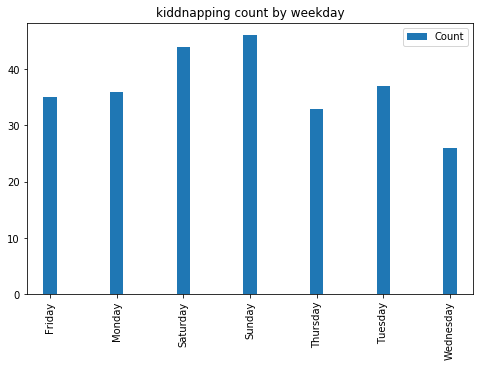

In [153]:

#y.set_xticklabels(y['DayOfWeek'])
y = temp.iloc[:, [0,3]]
y = y.rename(columns = {'Longitude':'Count'})
ax=y.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count by weekday', width=0.2)
ax.set_xticklabels(list(y['DayOfWeek']))


[Text(0, 0, '00'),
 Text(0, 0, '01'),
 Text(0, 0, '02'),
 Text(0, 0, '03'),
 Text(0, 0, '04'),
 Text(0, 0, '08'),
 Text(0, 0, '09'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23')]

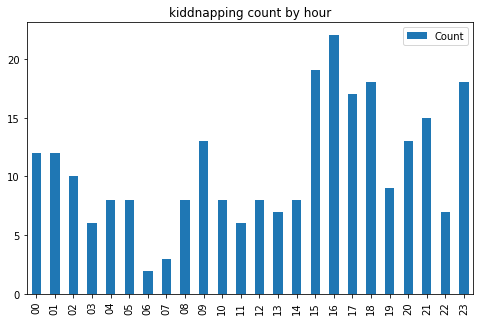

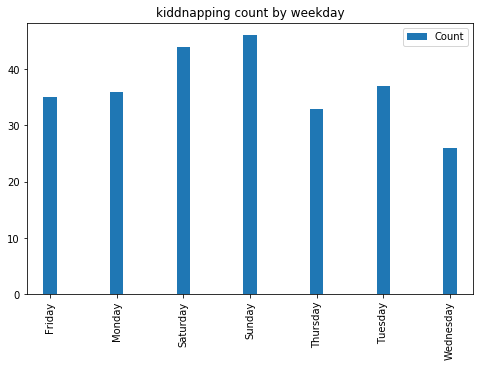

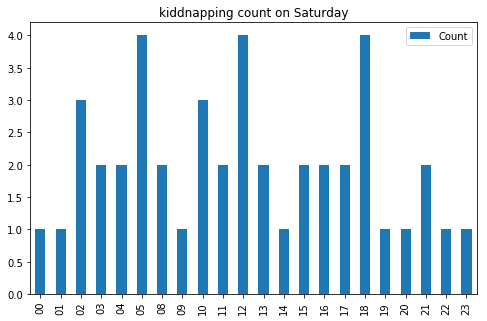

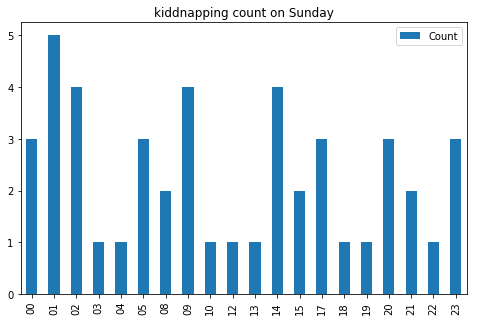

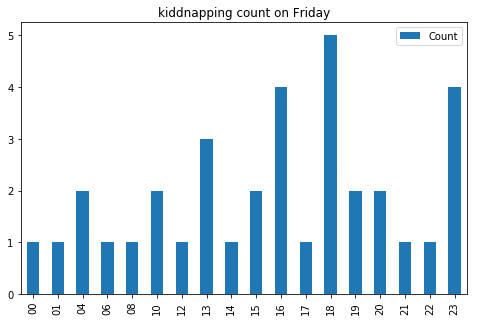

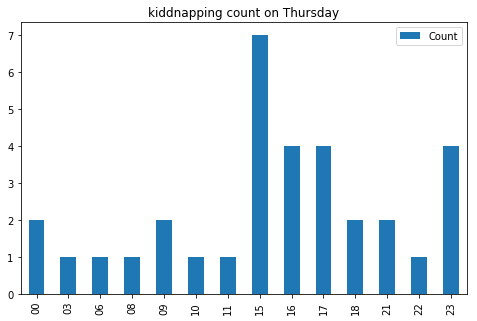

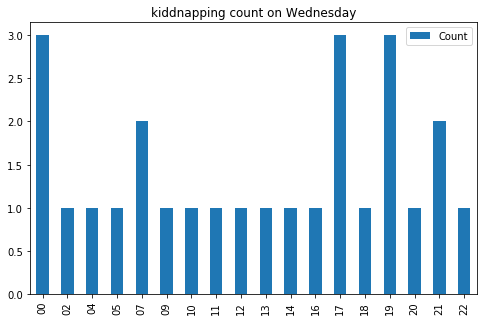

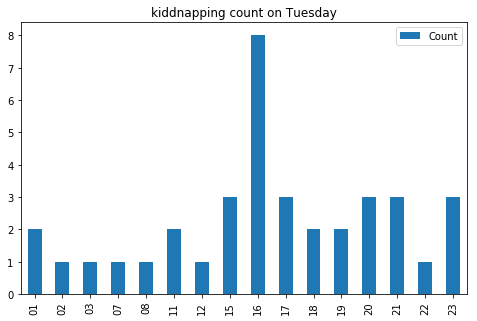

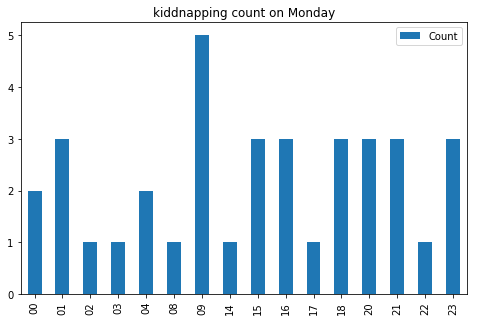

In [154]:

# creating dataframe x using Hour as group
x = temp2.iloc[:, [0,5]]
x = x.rename(columns = {'DayOfWeek':'Count'})
b_gf = x.plot(kind='bar', figsize=(8, 5), title = 'kiddnapping count by hour')
b_gf.set_xticklabels(list(x['Hour']))

# creating dataframe y using weekday as group

#y.set_xticklabels(y['DayOfWeek'])
y = temp.iloc[:, [0,3]]
y = y.rename(columns = {'Longitude':'Count'})
ax=y.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count by weekday', width=0.2)
ax.set_xticklabels(list(y['DayOfWeek']))


# Let's check Saturday vs. Thursdsay 


z = temp3[temp3['DayOfWeek'] == 'Saturday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Saturday')
c_gf.set_xticklabels(list(z['Hour']))

z = temp3[temp3['DayOfWeek'] == 'Sunday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Sunday')
c_gf.set_xticklabels(list(z['Hour']))


z = temp3[temp3['DayOfWeek'] == 'Friday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Friday')
c_gf.set_xticklabels(list(z['Hour']))

z = temp3[temp3['DayOfWeek'] == 'Thursday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Thursday')
c_gf.set_xticklabels(list(z['Hour']))


z = temp3[temp3['DayOfWeek'] == 'Wednesday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Wednesday')
c_gf.set_xticklabels(list(z['Hour']))


z = temp3[temp3['DayOfWeek'] == 'Tuesday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Tuesday')
c_gf.set_xticklabels(list(z['Hour']))



z = temp3[temp3['DayOfWeek'] == 'Monday'].reset_index() # check any pattern on weekend
z = z.iloc[:, [2,3]] # check any pattern on weekend
z = z.rename(columns = {'test':'Hour', 'index':'Count' })
c_gf = z.plot(kind='bar', figsize=(8, 5), title ='kiddnapping count on Monday')
c_gf.set_xticklabels(list(z['Hour']))

# ax.set_xticklabels(df.C, rotation=90)

#ax = df['B'].plot(kind='bar')
#ax.set_xticklabels(list(df['C']))
# higher frequecy of kidnapping in late afternoon when usually people off work or kids go school
# also higher frequency in the evening or midnight
# higher kidnapping occuring during the weekend
# what if we slice the data and time, doesn't see particular increasing trend




In [93]:
# create hist gram

In [155]:
#load foursquare login
CLIENT_ID = 'SPJ2UUQPO1THAUAWDC2UOSEIY4YKNBDLXYHELMKQT5QGL0DF' # your Foursquare ID
CLIENT_SECRET = '2C3SEFCT1QOLFNLGMAXQUMRRXKZM44LVT50NRVOTFJ02M5CB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: SPJ2UUQPO1THAUAWDC2UOSEIY4YKNBDLXYHELMKQT5QGL0DF
CLIENT_SECRET:2C3SEFCT1QOLFNLGMAXQUMRRXKZM44LVT50NRVOTFJ02M5CB


In [156]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            50) #Limit
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# need to change code

crime_venues = getNearbyVenues(names=crimedata_test['Neighbourhood'],
                                   latitudes=crimedata_test['Latitude'],
                                   longitudes=crimedata_test['Longitude']
                                  )
print(crime_venues.shape)
crime_venues.head()
crime_venues.groupby('Neighborhood').count()
print('There are {} uniques categories.'.format(len(crime_venues['Venue Category'].unique())))   hiding this to save time

In [158]:
crime_venues.shape

(8537, 7)

In [ ]:
## Get venue frequency data for location 

In [ ]:
crime_onehot = pd.get_dummies(crime_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
crime_onehot['Neighborhood'] = crime_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [crime_onehot.columns[-1]] + list(crime_onehot.columns[:-1])
crime_onehot = crime_onehot[fixed_columns]

crime_onehot.shape
crime_grouped = crime_onehot.groupby('Neighborhood').mean().reset_index()
crime_grouped.shape

num_top_venues = 5

for hood in crime_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = crime_grouped[crime_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
 # comment in order to avoid having speed up
  #  print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))  
  #  print('\n')

In [ ]:
## Create new dataframe with top 10 venue inforation per location

In [160]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = crime_grouped['Neighborhood']

for ind in np.arange(crime_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(crime_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()
#i noticed a problem here, my cluster information doesn't have crime frequency, but perhaps i can set feature clustering then compare where the common feature are 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BAYVIEW / 0 Block of BERTHA LN,Park,Bookstore,Art Gallery,Zoo,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop
1,BAYVIEW / 0 Block of BRIDGEVIEW DR,Southern / Soul Food Restaurant,Light Rail Station,Fried Chicken Joint,Bakery,Theater,BBQ Joint,Park,Market,Grocery Store,African Restaurant
2,BAYVIEW / 0 Block of CASHMERE ST,Park,Restaurant,Brewery,Bookstore,Non-Profit,Skate Park,Falafel Restaurant,English Restaurant,Ethiopian Restaurant,Event Space
3,BAYVIEW / 0 Block of COMMER CT,Park,Gym,Zoo,Farm,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor
4,BAYVIEW / 0 Block of GEORGE CT,Bus Station,Park,Brewery,Zoo,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Fabric Shop,Falafel Restaurant


In [163]:
crime_merged = crimedata_test
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
crime_merged = crime_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
crime_merged.dropna(axis=0, inplace=True)
crime_merged.head()


,PdDistrict,Latitude,Longitude,Neighbourhood,DayOfWeek,Hour,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,INGLESIDE,37.712200,-122.420864,INGLESIDE / 100 Block of BROOKDALE AV,Friday,08,Pool,Playground,Basketball Court,Bike Trail,Mexican Restaurant,Zoo,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit
1,SOUTHERN,37.784189,-122.407634,SOUTHERN / 800 Block of MARKET ST,Friday,16,Women's Store,Coffee Shop,Clothing Store,Toy / Game Store,Cosmetics Shop,Food Truck,Thai Restaurant,Marijuana Dispensary,Bubble Tea Shop,Department Store
2,INGLESIDE,37.723986,-122.435408,INGLESIDE / 4600 Block of MISSION ST,Friday,23,Chinese Restaurant,Mexican Restaurant,Bakery,Latin American Restaurant,Liquor Store,Grocery Store,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Pharmacy
3,BAYVIEW,37.719033,-122.398004,BAYVIEW / 1000 Block of LECONTE AV,Saturday,12,Breakfast Spot,Historic Site,Mountain,Burger Joint,Park,Bike Rental / Bike Share,Martial Arts Dojo,Farm,Event Space,Exhibit
4,BAYVIEW,37.729203,-122.374019,BAYVIEW / 700 Block of KIRKWOOD AV,Saturday,18,Harbor / Marina,Construction & Landscaping,Spa,Business Service,Zoo,Farm,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit


# K-mean clustering

In [ ]:
# create new matrix with location data
# set number of clusters
kclusters = 5

crime_grouped_clustering = crime_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crime_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

crime_merged = crimedata_test
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
crime_merged = crime_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
crime_merged.dropna(axis=0, inplace=True)
crime_merged

In [174]:
crime_merged.head()
crime_merged.to_csv('crime_merged.csv', index=False)

# Create cluster map

In [166]:
## Apply Clusetering Analysis
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]# add markers to the map

markers_colors = []
for lat, lon, poi, cluster in zip(crime_merged['Latitude'], crime_merged['Longitude'], crime_merged['Neighbourhood'], crime_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [97]:
#analysis

In [ ]:
cluster2 = crime_merged.loc[crime_merged['Cluster Labels'] == 1]
cluster2


# Optional loading crime_merged.csv for offline work

In [46]:
crime_merged = pd.read_csv('crime_merged.csv')
crime_merged.head()

,PdDistrict,Latitude,Longitude,Neighbourhood,DayOfWeek,Hour,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,INGLESIDE,37.712200,-122.420864,INGLESIDE / 100 Block of BROOKDALE AV,Friday,8,4,Pool,Playground,Basketball Court,Bike Trail,Mexican Restaurant,Zoo,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit
1,SOUTHERN,37.784189,-122.407634,SOUTHERN / 800 Block of MARKET ST,Friday,16,2,Women's Store,Coffee Shop,Clothing Store,Toy / Game Store,Cosmetics Shop,Food Truck,Thai Restaurant,Marijuana Dispensary,Bubble Tea Shop,Department Store
2,INGLESIDE,37.723986,-122.435408,INGLESIDE / 4600 Block of MISSION ST,Friday,23,2,Chinese Restaurant,Mexican Restaurant,Bakery,Latin American Restaurant,Liquor Store,Grocery Store,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Pharmacy
3,BAYVIEW,37.719033,-122.398004,BAYVIEW / 1000 Block of LECONTE AV,Saturday,12,3,Breakfast Spot,Historic Site,Mountain,Burger Joint,Park,Bike Rental / Bike Share,Martial Arts Dojo,Farm,Event Space,Exhibit
4,BAYVIEW,37.729203,-122.374019,BAYVIEW / 700 Block of KIRKWOOD AV,Saturday,18,3,Harbor / Marina,Construction & Landscaping,Spa,Business Service,Zoo,Farm,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit


In [50]:
cluster1 = crime_merged.loc[crime_merged['Cluster Labels'] == 0, crime_merged.columns[[0] + list(range(4, crime_merged.shape[1]))]]
cluster1.to_csv('cluster1.csv', index=False)
cluster1.shape

(14, 14)

In [98]:
#cluster analysis

In [51]:
cluster2 = crime_merged.loc[crime_merged['Cluster Labels'] == 1, crime_merged.columns[[0] + list(range(4, crime_merged.shape[1]))]]
cluster2.to_csv('cluster2.csv', index=False)
cluster2.shape

(13, 14)

In [52]:
cluster3 = crime_merged.loc[crime_merged['Cluster Labels'] == 2, crime_merged.columns[[0] + list(range(4, crime_merged.shape[1]))]]
cluster3.to_csv('cluster3.csv', index=False)
cluster3.shape

(167, 14)

In [54]:
cluster4 = crime_merged.loc[crime_merged['Cluster Labels'] == 3, crime_merged.columns[[0] + list(range(4, crime_merged.shape[1]))]]
cluster4.to_csv('cluster4.csv', index=False)
cluster4.shape

(58, 14)

In [55]:
cluster5 = crime_merged.loc[crime_merged['Cluster Labels'] == 4, crime_merged.columns[[0] + list(range(4, crime_merged.shape[1]))]]
cluster5.to_csv('cluster5.csv', index=False)
cluster5.shape

(5, 14)

# so the biggest cluster is 2, let's analyse the feature of cluster 2


In [ ]:
cluster3 = crime_merged.loc[crime_merged['Cluster Labels'] == 1, crime_merged.columns[[2] + list(range(5, crime_merged.shape[1]))]]
cluster3
# most incicidents concentrated around Mexican res, night club ... could there be an ethnic bias? 

In [ ]:
cluster3

In [64]:
crime_merged.head() # pls add weekday and time information there to detect pattern for park centred cluster

,PdDistrict,Latitude,Longitude,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,INGLESIDE,37.712200,-122.420864,INGLESIDE / 100 Block of BROOKDALE AV,2,Pool,Playground,Mexican Restaurant,Bike Trail,Bus Stop,Fabric Shop,Elementary School,Empanada Restaurant,English Restaurant,Ethiopian Restaurant
1,SOUTHERN,37.784189,-122.407634,SOUTHERN / 800 Block of MARKET ST,1,Women's Store,Coffee Shop,Toy / Game Store,Clothing Store,Cosmetics Shop,Thai Restaurant,Food Truck,Bubble Tea Shop,Marijuana Dispensary,Department Store
2,INGLESIDE,37.723986,-122.435408,INGLESIDE / 4600 Block of MISSION ST,0,Bakery,Mexican Restaurant,Donut Shop,Filipino Restaurant,Pizza Place,Sandwich Place,Vietnamese Restaurant,Chinese Restaurant,Grocery Store,Latin American Restaurant
3,BAYVIEW,37.719033,-122.398004,BAYVIEW / 1000 Block of LECONTE AV,2,Light Rail Station,Breakfast Spot,Park,Burger Joint,Fabric Shop,Elementary School,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space
4,BAYVIEW,37.729203,-122.374019,BAYVIEW / 700 Block of KIRKWOOD AV,1,Liquor Store,Spa,Public Art,Warehouse Store,Harbor / Marina,Art Gallery,Zoo,Exhibit,Electronics Store,Elementary School


In [ ]:
cluster1

# Note, please add weekday and time back to crimedata_results and re-run the procedure to get a sense of what risks poses - 
# also start to work on groupping results to get an analytical conclusion 
# what weekday, time are more dangerous at cluster 2 and 3
# compare with econmic map

In [ ]:
cluster1 #restaurant focused chinese japanese thai vietnam

In [ ]:
cluster2  #mexican 

In [ ]:
cluster3 #interesting outdoor

In [41]:
# print out cluster size
print("cluster 1's size is " + str(cluster1.shape))
print("cluster 2's size is " + str(cluster2.shape))
print("cluster 3's size is " + str(cluster3.shape))
print("cluster 4's size is " + str(cluster4.shape))
print("cluster 5's size is " + str(cluster5.shape))

cluster 1's size is (14, 13)
cluster 2's size is (13, 13)
cluster 3's size is (167, 13)
cluster 4's size is (58, 13)
cluster 5's size is (5, 13)


In [ ]:
cluster4.head(10)

In [ ]:
cluster5 #cluster 4 and 5 are less interesting

In [4]:
#Read file from saved csv 
cluster1 = pd.read_csv('cluster1.csv')
cluster2 = pd.read_csv('cluster2.csv')
cluster3 = pd.read_csv('cluster3.csv')
cluster4 = pd.read_csv('cluster4.csv')
cluster5 = pd.read_csv('cluster5.csv')
#data.describe()


# Cluster 4 analysis  

[Text(0, 0, 'Park'),
 Text(0, 0, 'Light Rail Station'),
 Text(0, 0, 'Southern / Soul Food Restaurant'),
 Text(0, 0, 'Playground'),
 Text(0, 0, 'Mountain'),
 Text(0, 0, 'Grocery Store'),
 Text(0, 0, 'Rental Car Location'),
 Text(0, 0, 'Intersection'),
 Text(0, 0, 'Brewery')]

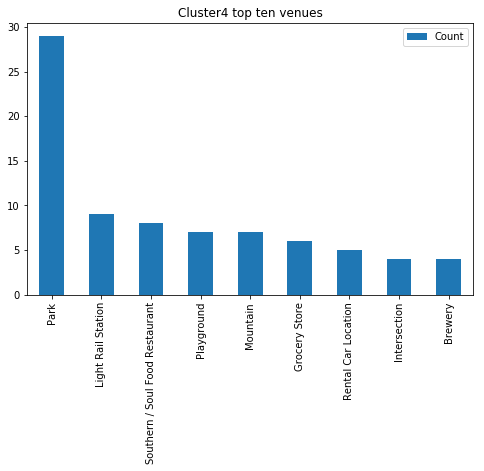

In [32]:
# mark the most common venue by cluster 
a = cluster4['1st Most Common Venue']
b = cluster4['2nd Most Common Venue']
c = cluster4['3rd Most Common Venue']
frames = [a, b, c]
cluster_feature_vector = pd.concat(frames)
cluster_feature_vector = pd.DataFrame({'venue':cluster_feature_vector.values, 'Count':cluster_feature_vector.index})
cluster_feature_vector.shape
cluster_feature_vector = cluster_feature_vector.groupby(['venue'])['Count'].count().reset_index()
cluster_feature_vector = cluster_feature_vector.sort_values(['Count'], ascending=False)
cluster_feature_vector.head(10)
d_gf = cluster_feature_vector.iloc[0:9,:].plot(kind='bar', figsize=(8, 5), title = 'Cluster4 top ten venues')
d_gf.set_xticklabels(list(cluster_feature_vector['venue']))

#now take a look at weekday time

temp = cluster4.groupby('DayOfWeek').count().reset_index()
temp2 = cluster4.groupby('Hour').count().reset_index()

# creating dataframe y using weekday as group

#y.set_xticklabels(y['DayOfWeek'])
y = temp.iloc[:, 0:2]
y = y.rename(columns = {'PdDistrict':'Count'})
y = y.sort_values(['Count'], ascending=False)
e_gf=y.plot(kind='bar', figsize=(8, 5), title ='Cluster4 incident by weekday', width=0.2)
e_gf.set_xticklabels(list(y['DayOfWeek']))

# creating dataframe x using Hour as group
x = temp2.iloc[:, 0:2]
x = x.rename(columns = {'PdDistrict':'Count'})
#x = x.sort_values(['Count'], ascending=False)
f_gf=x['Count'].plot(kind='bar', figsize=(8, 5), title ='Cluster4 incident by hour', width=0.2)
f_gf.set_xticklabels(list(x['Hour']))


# Cluster 3 analysis



In [ ]:
# mark the most common venue by cluster 
a = cluster3['1st Most Common Venue']
b = cluster3['2nd Most Common Venue']
c = cluster3['3rd Most Common Venue']
frames = [a, b, c]
cluster_feature_vector = pd.concat(frames)
cluster_feature_vector = pd.DataFrame({'venue':cluster_feature_vector.values, 'Count':cluster_feature_vector.index})
cluster_feature_vector.shape
cluster_feature_vector = cluster_feature_vector.groupby(['venue'])['Count'].count().reset_index()
cluster_feature_vector = cluster_feature_vector.sort_values(['Count'], ascending=False)
cluster_feature_vector.head(10)
d_gf = cluster_feature_vector.iloc[0:9,:].plot(kind='bar', figsize=(8, 5), title = 'Cluster3 top ten venues')
d_gf.set_xticklabels(list(cluster_feature_vector['venue']))

#now take a look at weekday time

temp = cluster3.groupby('DayOfWeek').count().reset_index()
temp2 = cluster3.groupby('Hour').count().reset_index()

# creating dataframe y using weekday as group

#y.set_xticklabels(y['DayOfWeek'])
y = temp.iloc[:, 0:2]
y = y.rename(columns = {'PdDistrict':'Count'})
y = y.sort_values(['Count'], ascending=False)
e_gf=y.plot(kind='bar', figsize=(8, 5), title ='Cluster3 incident by weekday', width=0.2)
e_gf.set_xticklabels(list(y['DayOfWeek']))

# creating dataframe x using Hour as group
x = temp2.iloc[:, 0:2]
x = x.rename(columns = {'PdDistrict':'Count'})
#x = x.sort_values(['Count'], ascending=False)
f_gf=x['Count'].plot(kind='bar', figsize=(8, 5), title ='Cluster3 incident by hour', width=0.2)
f_gf.set_xticklabels(list(x['Hour']))


[Text(0, 0, 'Monday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Wednesday')]

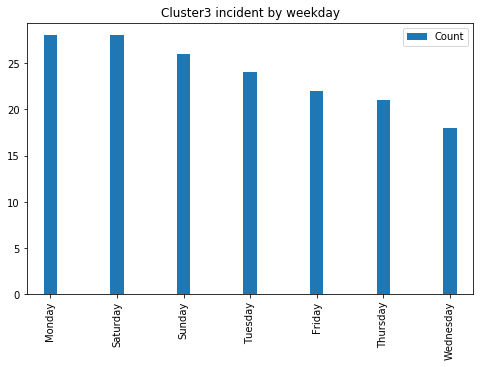

In [80]:

#y.set_xticklabels(y['DayOfWeek'])
y = temp.iloc[:, 0:2]
y = y.rename(columns = {'PdDistrict':'Count'})
y = y.sort_values(['Count'], ascending=False)
e_gf=y.plot(kind='bar', figsize=(8, 5), title ='Cluster3 incident by weekday', width=0.2)
e_gf.set_xticklabels(list(y['DayOfWeek']))


[Text(0, 0, 'BAYVIEW'),
 Text(0, 0, 'INGLESIDE'),
 Text(0, 0, 'MISSION'),
 Text(0, 0, 'NORTHERN'),
 Text(0, 0, 'PARK'),
 Text(0, 0, 'RICHMOND'),
 Text(0, 0, 'SOUTHERN'),
 Text(0, 0, 'TARAVAL')]

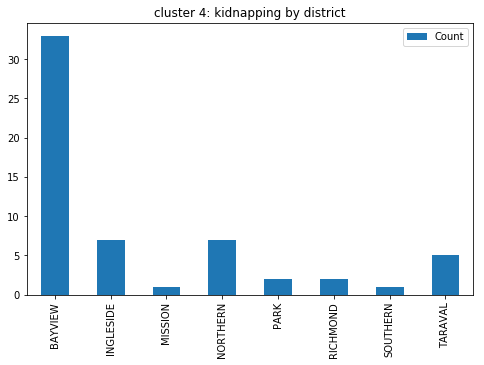

In [96]:
# use the same code for cluster 3 and 4
hello = cluster4[['PdDistrict', 'Cluster Labels']].groupby('PdDistrict')['Cluster Labels'].count().reset_index(name = 'Count')
g_gf = hello.plot(kind='bar', figsize=(8, 5), title = 'cluster 4: kidnapping by district')
g_gf.set_xticklabels(list(hello['PdDistrict']))

In [88]:
cluster3.head()

,PdDistrict,DayOfWeek,Hour,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,SOUTHERN,Friday,16,2,Women's Store,Coffee Shop,Clothing Store,Toy / Game Store,Cosmetics Shop,Food Truck,Thai Restaurant,Marijuana Dispensary,Bubble Tea Shop,Department Store
2,INGLESIDE,Friday,23,2,Chinese Restaurant,Mexican Restaurant,Bakery,Latin American Restaurant,Liquor Store,Grocery Store,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Pharmacy
5,CENTRAL,Saturday,5,2,Chinese Restaurant,Italian Restaurant,Dive Bar,Coffee Shop,Cocktail Bar,Bakery,Tea Room,Vietnamese Restaurant,Asian Restaurant,Szechuan Restaurant
6,RICHMOND,Wednesday,11,2,Chinese Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant,Café,Dim Sum Restaurant,Vietnamese Restaurant,Korean Restaurant,Bubble Tea Shop,Bakery
7,BAYVIEW,Tuesday,20,2,Chinese Restaurant,Vietnamese Restaurant,Bakery,Grocery Store,Coffee Shop,Bubble Tea Shop,Bus Station,Sandwich Place,Dim Sum Restaurant,Recreation Center


In [97]:
cluster3.head(10)

,PdDistrict,DayOfWeek,Hour,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,SOUTHERN,Friday,16,2,Women's Store,Coffee Shop,Clothing Store,Toy / Game Store,Cosmetics Shop,Food Truck,Thai Restaurant,Marijuana Dispensary,Bubble Tea Shop,Department Store
2,INGLESIDE,Friday,23,2,Chinese Restaurant,Mexican Restaurant,Bakery,Latin American Restaurant,Liquor Store,Grocery Store,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Pharmacy
5,CENTRAL,Saturday,5,2,Chinese Restaurant,Italian Restaurant,Dive Bar,Coffee Shop,Cocktail Bar,Bakery,Tea Room,Vietnamese Restaurant,Asian Restaurant,Szechuan Restaurant
6,RICHMOND,Wednesday,11,2,Chinese Restaurant,Grocery Store,Sushi Restaurant,Mexican Restaurant,Café,Dim Sum Restaurant,Vietnamese Restaurant,Korean Restaurant,Bubble Tea Shop,Bakery
7,BAYVIEW,Tuesday,20,2,Chinese Restaurant,Vietnamese Restaurant,Bakery,Grocery Store,Coffee Shop,Bubble Tea Shop,Bus Station,Sandwich Place,Dim Sum Restaurant,Recreation Center
8,SOUTHERN,Tuesday,16,2,Coffee Shop,Cocktail Bar,Beer Bar,Theater,Bakery,Marijuana Dispensary,Gym,Café,Brewery,Taco Place
9,BAYVIEW,Wednesday,22,2,Furniture / Home Store,Coffee Shop,American Restaurant,Art Gallery,Brewery,Gym / Fitness Center,Burger Joint,Café,Nightclub,Massage Studio
10,MISSION,Thursday,23,2,Mexican Restaurant,Coffee Shop,Bakery,Bookstore,Fish Market,Italian Restaurant,Latin American Restaurant,Performing Arts Venue,Public Art,South American Restaurant
15,NORTHERN,Sunday,15,2,Spa,Gym / Fitness Center,Bar,Café,Wine Shop,Park,Italian Restaurant,Mediterranean Restaurant,Liquor Store,French Restaurant
16,BAYVIEW,Saturday,12,2,Chinese Restaurant,Grocery Store,Pizza Place,Vietnamese Restaurant,Intersection,Pharmacy,Rental Car Location,Dim Sum Restaurant,Diner,Park


In [99]:
cluster4.head(10)

,PdDistrict,DayOfWeek,Hour,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BAYVIEW,Saturday,12,3,Breakfast Spot,Historic Site,Mountain,Burger Joint,Park,Bike Rental / Bike Share,Martial Arts Dojo,Farm,Event Space,Exhibit
4,BAYVIEW,Saturday,18,3,Harbor / Marina,Construction & Landscaping,Spa,Business Service,Zoo,Farm,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit
12,BAYVIEW,Saturday,20,3,Southern / Soul Food Restaurant,Light Rail Station,Fried Chicken Joint,Bakery,Theater,BBQ Joint,Park,Market,Grocery Store,African Restaurant
13,PARK,Thursday,0,3,Park,Café,Deli / Bodega,Coffee Shop,Garden,Middle Eastern Restaurant,Sushi Restaurant,Bus Station,College Gym,Rental Car Location
29,TARAVAL,Sunday,21,3,Rental Car Location,Light Rail Station,Park,Burger Joint,Thai Restaurant,Gas Station,Garden,Laundromat,Gym,Mexican Restaurant
33,INGLESIDE,Sunday,18,3,Trail,Park,Dog Run,Grocery Store,Playground,Café,Scenic Lookout,Chinese Restaurant,Exhibit,Elementary School
35,BAYVIEW,Thursday,17,3,Grocery Store,Light Rail Station,Vietnamese Restaurant,Spa,BBQ Joint,Latin American Restaurant,Park,Business Service,Mexican Restaurant,Distillery
37,INGLESIDE,Sunday,19,3,Light Rail Station,Convenience Store,Vietnamese Restaurant,Café,Sandwich Place,Donut Shop,Park,Train Station,Coffee Shop,Breakfast Spot
41,NORTHERN,Sunday,14,3,Park,Indian Restaurant,Liquor Store,Playground,Record Shop,Coffee Shop,Roller Rink,Sandwich Place,Pakistani Restaurant,Dog Run
44,NORTHERN,Sunday,14,3,Park,Indian Restaurant,Liquor Store,Playground,Record Shop,Coffee Shop,Roller Rink,Sandwich Place,Pakistani Restaurant,Dog Run


# Appendix plot the mission southern and bay view

In [105]:
crime_merged.head()

,PdDistrict,Latitude,Longitude,Neighbourhood,DayOfWeek,Hour,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,INGLESIDE,37.712200,-122.420864,INGLESIDE / 100 Block of BROOKDALE AV,Friday,8,4,Pool,Playground,Basketball Court,Bike Trail,Mexican Restaurant,Zoo,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit
1,SOUTHERN,37.784189,-122.407634,SOUTHERN / 800 Block of MARKET ST,Friday,16,2,Women's Store,Coffee Shop,Clothing Store,Toy / Game Store,Cosmetics Shop,Food Truck,Thai Restaurant,Marijuana Dispensary,Bubble Tea Shop,Department Store
2,INGLESIDE,37.723986,-122.435408,INGLESIDE / 4600 Block of MISSION ST,Friday,23,2,Chinese Restaurant,Mexican Restaurant,Bakery,Latin American Restaurant,Liquor Store,Grocery Store,Sandwich Place,Vietnamese Restaurant,Japanese Restaurant,Pharmacy
3,BAYVIEW,37.719033,-122.398004,BAYVIEW / 1000 Block of LECONTE AV,Saturday,12,3,Breakfast Spot,Historic Site,Mountain,Burger Joint,Park,Bike Rental / Bike Share,Martial Arts Dojo,Farm,Event Space,Exhibit
4,BAYVIEW,37.729203,-122.374019,BAYVIEW / 700 Block of KIRKWOOD AV,Saturday,18,3,Harbor / Marina,Construction & Landscaping,Spa,Business Service,Zoo,Farm,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit


In [143]:
def target_map(cluster_label, district_name):

    crime_sample = crime_merged[crime_merged['Cluster Labels'] == cluster_label]
    #crime_sample = crime_sample[crime_sample['PdDistrict'] == district_name]
    ## Apply Clusetering Analysis
# create map
    for lat, lng, district, address in zip(crime_sample['Latitude'], crime_sample['Longitude'], crime_sample['PdDistrict'], crime_sample['Neighbourhood']):
        label = '{}, {}'.format(district, address)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
    return map_sanfrancisco
    

In [142]:
address = 'San Francisco, SF.'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=15)
map_sanfrancisco



The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


In [144]:
target_map(3, 'BAYVIEW')

(257, 17)